# About neutrino masses


In [1]:
import time
print(' Last version ', time.asctime() )

 Last version  Mon Feb 13 17:46:36 2023


In [3]:
# general imports
%matplotlib inline
%reload_ext autoreload
%autoreload 2
 
# numpy and matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats     as stats
import scipy.constants as units

plt.style.context('seaborn-colorblind');

*About*

About the masses of Dirac Fermions. The appereance of the maxing matrix

About the basic of Majorana neutrinos.

The Degenerancy between leptonic, helicity and chirality in the low mass regime.

About Majorana masses.

The See-Saw Mechanisme and the Weinberg operator

Search for the N Majorana neutrinos



## The neutrino masses

Fermi [8] and Perrin [9] suggested in 1933 that the mass of the neutrino can be meaured at the end point of the $\beta$ spectrum in $\mathrm{^3H} \to \mathrm{^3H} + e + \bar{\nu}_e$ due its small $Q$-value, 18.6 keV.

The decay is super-allowed and depends on the phase space:

$$
\frac{\mathrm{d}N_e}{\mathrm{d}E} \propto p^2_e E_\nu p_\nu F(E) 
$$

where $F(E)$ is the Fermi function (we can approximate as constant at the end point), $p_e, p_\nu$, the momentum of the electron and neutrino, and $E_\nu$, the energy of the neutrino.


If we sustitute, $E_\nu = (Q-E_e), \; p_\nu = \sqrt{(Q-E_e)^2 - m^2_{\nu_e}}$ 

$$
\frac{\mathrm{d}N_e}{\mathrm{d}E} \propto p^2_e  F(E) (Q- E_e) \sqrt{(Q-E_e)^2 - m^2_{\nu_e}}
$$

The Kurie plot is linear in $E_e$ and the end point is lowered due to $m_{\nu_e}$. 

$$
K(E_e) = \frac{1}{p_e}\sqrt{\frac{\mathrm{d}N_e}{\mathrm{d} E}}
$$


In [2]:
def tritium_spectrum(Q0 = 18.6e3, m_nu = 1):
    def fun(E_e, FE = 1.):
        Enu  = Q0 - E_e
        pnu2 = Enu**2 - m_nu**2
        Enu[Enu   < 0] = 0.
        pnu2[pnu2 < 0] = 0.
        dNdE = FE * Enu * np.sqrt(pnu2)
        return np.sqrt(dNdE)
    return fun

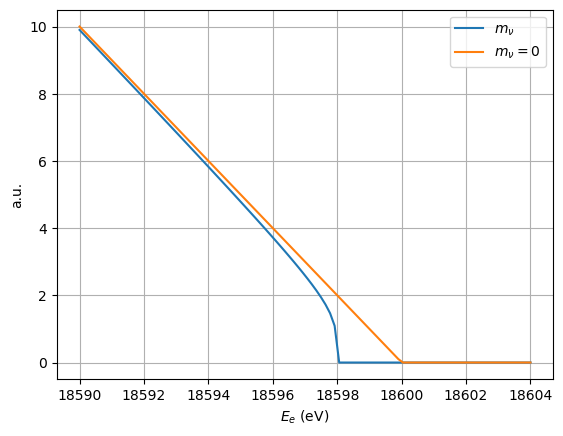

In [3]:
Q0, m_nu = 18.6e3, 2. # eV
fe       = tritium_spectrum(Q0, m_nu)
fe0      = tritium_spectrum(Q0, 0.)
enes     = np.linspace( Q0 - 10, Q0 + 4, 100)
plt.plot(enes, fe(enes) , label = r'$m_\nu$'); 
plt.plot(enes, fe0(enes), label = r'$m_\nu = 0$');
plt.legend(); plt.grid(); plt.xlabel(r'$E_e$ (eV)'); plt.ylabel('a.u.');



*Question*: Show that in the current paradigm of 3 neutrinos $m_{\nu_e} \to m^{eff}_{\nu_e}$ with:

$$
(m^{eff}_{\nu_e})^2 = \sum_{i=1,3} |U_{ei}|^2 m^2_i
$$

where $U_{ei}$ are the elements of the $U_{PMNS}$ matrix related with the electron flavour.



### The Katrin experiment

| |
| :--: |
| <img src="./imgs/Katrin_spectrum.png" width=400 align="center">|

The best limit has been obtained by [KATRIN experiment](http://www.katrin.kit.edu) in 2019 [[9]](https://arxiv.org/abs/1909.06048) with best estimated of $\hat{m}_\nu = −1.0^{+0.9}_{−1.1}$ eV and $m^{eff}_\nu < 0.8$ eV at 90% C.L. with F.C. method.

   - A large spectrometer currently taken data.

   - The experiment has an estimated sensitivity 0.2 eV.


Other neutrino mass limits:

- $m^{eff}_{\nu_\mu} \le 190$ keV at 90% CL, using pion decay, $\pi^+ \to \mu^+ \, \bar{\nu}_{\mu}$ [[10]](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.53.6065)

- $m^{eff}_{\nu_\tau} \le 18.2$ MeV at 95% CL, using tau decays, $\tau \to 5 \pi \, \bar{\nu}_\tau$ [[11]](http://cds.cern.ch/record/337738)

The current limits from Cosmology are more stringent:

- From Cosmic Microwave Background and Large Scale Structures formation, the bound obtained by Planck [[12]](https://arxiv.org/abs/1807.06209) at 95 % C.L. is:

$$
\sum_{i=1, 3} m_i \le 0.12 \; \mathrm{eV}
$$

but it may depend on model assumptions.

## Dirac, Weyl and Mayorana spinors

The objetice of Dirac when introducing his equation was to describe free electrons.

The Dirac ecuation describes the dinamic of free fermions ($s = 1/2$).

$$
i \gamma^\mu \partial_\mu \Psi - m \Psi = 0
$$

with mass $m$.

The Dirac equation:

 - is linear in the space-coordenates $\partial_\mu$. Time and space enter in equal condition.

 - has embebed the Einstein equation $m^2 = E - p^2$, via the 4 Dirac matrices $\gamma^\mu$, they fulfill

 $$
 \{ \gamma^\mu, \gamma^\nu \} = 2 g^{\mu\nu}, \;\; 
 (\gamma^0)^\dagger = \gamma^0, \; (\gamma^i)^\dagger = \gamma^i
 $$

We define the adjoint as $\bar{\Psi} = \gamma^0 \Psi^\dagger$

The Dirac equation comes from the Euler equation of the Lagrangian:

$$
i \bar{\Psi} \gamma^\mu \Psi - m \bar{\Psi} \Psi = 0
$$

And the Hamiltonian is:

$$
H \Psi = (i \gamma^0 \gamma^i \partial_i - \gamma^0 m) \Psi
$$



The Dirac equation admits the Fourier decomposition:

$$
\Psi(x) = \sum_{s} \int_p \left[ u_s(p) a_s(p) e^{-i p x} + v_s(p) b^\dagger(p) e^{+ipx} \right]
$$

where $s = 1, 2$ for the spins and $u_s(p)$, and $v_s(p)$ are the Dirac spinors, composed of 4 complex elements, which depends on $\mathrm{p}$. 

The $u_s(p)$ spinor is associated to the particle, the positive energy solutions of the Dirac equation, and the $v_s(p)$ spinor is associated to the anti-particles.



### Helicity and Chirality

We define the helicity as the projection of the spin in the momentun direction of the particle:

$$
h = \Sigma \cdot {\hat p}, \;\; \Sigma = 2 \, S
$$

As the Hamiltonian conmutes with the total angular momentun $J = L + S$, then the helicity conmutes with $H$, $[H, h] = 0$, and it is a conserved quantity.

We can descopompose the solutions of the Dirac equation in the base of the helicity. The eigen-values of helicity are $\pm 1$. 

But, it is not a Lorentz invariante, as changing to a reference frame where the observer goes with larger $\bf{p}$ than then particle, it changes its helicity.

## Dirac masses. The appareance of the mixing matrix

### No mass. Neutrinos as a Weyld spinor

The Dirac equation translates to two coupled equations, expressed in terms of the quirality fields,

$$
i \gamma^\mu \partial_\mu \Psi_L = m \Psi_R, \\
i \gamma^\mu \partial_\mu \Psi_R = m \Psi_L
$$

They decouple if $m = 0$.

In the 60's, Landau, Lee-Yand and Salam, from the V-A interaccions of the weak decays, and the almost null, non-observed mass of the neutrino, postulated that $m_\nu = 0$, and therefore only one field $\nu_L$ was needed in the SM to describe the neutrino interactions.




### One family

We can introduce a Dirac mass term introducing a *sterile* field $\nu_R$ that couples with the Higgs conjugate $\tilde{\Phi}$. The mass term in the lagrangian is:

$$
-\mathcal{L}^D = \lambda^\nu (L^T \tilde{\Psi}) \nu_R + \mathrm{h.c.}
$$

That after SSB, we obtain the mass term:

$$
\frac{\lambda^\nu v}{\sqrt{2}} \bar{\nu}_L \nu_R + \mathrm{h.c.}
$$

And we encounter the *un-natural* fact that $\lambda^\nu \ll \lambda^e$. Or in other words, why the neutrino mass is so small compared with the other fermion masses if the mechanims that provides mass to the neutrinos is the same than works for electrons?



### Three families

Consider the three families lepton flavour states, $l'_\alpha,\nu'_\alpha, \; i=e,\mu,\tau$, the left-chiral components doublets $L'_\alpha$ and the right-chiral singlets $l'_R$, including $\nu'_{\alpha, R}$

The most **general** Dirac mass lagrangian via de *complex* Yukawa couplings with the Higgs doublet $\Phi$ and its conjugate $\tilde{\Phi}$:

$$
-\mathcal{L}_m = \sum_{\alpha,\beta} \lambda^l_{\alpha \beta} (\bar{L}'_\alpha \, \Phi) \, l'_{\beta R} + \lambda^\nu_{\alpha\beta} (\bar{L}'_\alpha \, \tilde{\Phi}) \,\nu'_{\beta R} + \mathrm{h.c.}
$$

Notice that we couple the different doublets $L_{\alpha}$ with the singles $l_{\alpha R}, \, \nu_{\alpha R}$


After SSB:
$$
-\mathcal{L}_m = \frac{v}{\sqrt{2}} \left( {\bf \lambda}_l \bar{{\bf l}}'_L {\bf l'}_R + \lambda_\nu \bar{{\bf \nu}}'_L {\bf \nu}'_R + \mathrm{h.c.} \right)
$$

where $\lambda_l, \, \lambda_\nu$ are $3\times3$ complex matrices, kown as Yukawa. And 

$$
{\bf l}'_L = \begin{pmatrix} e'_L\\ \mu'_L \\ \tau'_L \end{pmatrix} \;\;\,
{\bf \nu}'_L = \begin{pmatrix} \nu'_{eL}\\ \nu'_{\mu L} \\ \nu'_{\tau L} \end{pmatrix} 
$$

There is a theorem that says that a complex matrix $Y$ can be written as, $Y = H U$, where $H$ es hermitian and $U$ unitary, and as a corollary, $Y = U^\dagger M V$, where $U, V$ are unitary and $M$ es diagonal, with non-zero, possitive elements.

Therefore, the $\frac{v}{\sqrt{2}}\lambda_k$ matrix can be diagonalized with real values in the diagonal, $M_k$ via a bi-unitary transformation $V_k, \,U_h$, with $k = l, \, \nu$:

$$
\lambda_k = U^\dagger_k \, M_\alpha V_k
$$






And we can relate the weak states to the mass states via:

$$
  l_L = U_l \, l'_L, \,\; \nu_L = U_\nu \, \nu'_L \\
  l_R = V_l \, l'_R, \,\; \nu_R = V_\nu \, \nu'_R
$$

And the mass part of the lagrangian:

$$
-\mathcal{L}_m =   M_l \, \bar{l}_L l_R + M_\nu \, \bar{\nu}_L \nu_R + \mathrm{hc} 
$$


This does not affect the NC of the lagrangian:

$$
- \mathcal{L}_{NC} =  \frac{g}{2 \cos \theta_W} \bar{\nu}'_{L} \gamma^\mu \nu'_{L} Z_\mu
=  \frac{g}{2 \cos \theta_W} \bar{\nu}_{L} \gamma^\mu \, (U^\dagger_\nu U_\nu) \, \nu_{L} Z_\mu
$$

because $U^\dagger_\nu U_\nu = I$

But it does the CC lagrangian:

$$
- \mathcal{L}_{CC} = 
\frac{g}{\sqrt{2}} \bar{l}'_{L} \gamma^\mu \nu'_L W^+_\mu + \mathrm{h.c.} = 
\frac{g}{\sqrt{2}} \bar{l}_{L}  \gamma^\mu \, (U^\dagger_l U_\nu) \, \nu_L W^+_\mu + \mathrm{h.c.}
$$

Where:

$$
U = U^\dagger_l \, U_\nu
$$

It is the *unitary* matrix that mix the neutrino flavour and mass states, known ad Pontecorbo-Maki-Nakawaga-Sakata matrix, responsible of the *neutrino oscillations*.

This a unitary $3\times3$ matrix has $9$ parameters, $3$ mixing angles, and $6$ phases. 

But we can use the global symmetries of the Dirac fields to re-absorbe the some phases of $U$:

$$
l_\alpha \to e^{i\phi_\alpha} l_\alpha, \;\;\; \nu_i \to e^{i \phi_i} \nu_i
$$

With $\alpha = e, \mu, \tau$ and $i = 1, 2, 3$.

The CC lagrangian is:

$$
\sum_{\alpha i } \bar{l}_{\alpha L} e^{-i\phi_\alpha} U_{\alpha i} \gamma^\mu \, e^{i\phi_i} \nu_{i L} \, W^+_\mu + \mathrm{h.c.}
$$



We can take out a global factor that does not affect the physics:

$$
e^{-i(\phi_e-\phi_1)} \sum_{\alpha i} \bar{l}_{\alpha L} \gamma^\mu \, ( e^{-i(\phi_\alpha-\phi_e)} U_{\alpha i} \gamma^\mu e^{i(\phi_\beta-\phi_1)} ) \, \nu_{i L} W^+_\mu + \mathrm{h.c.}
$$

In total we can reabsorb $5$ phases. Therefore there is only one phase left in $U$, that is, the CP-violation phase, $\delta_{CP}$.


The usual parameterization of $U_{PMNS}$ in terms of 3 angles and one CP-phase:

| |
| :--: |
|<img src="./imgs/Umatrix_dirac.png" width = 800>| 

The $U$ mixing matrix still preserves the *lepton number*, as we can take a global phase in all the fermions at the same time.

$$
l_\alpha \to e^{i\phi} l_\alpha, \;\; \nu_{i} \to e^{i\phi} \nu_i
$$

and the interaction and the mass lagrangian terms are invariant.


But the *family lepton number* is nor preserved.

As the transformation, for only one family

$$
l_\alpha \to e^{i\phi} l_\alpha, \;\; \nu_{\alpha} \to e^{i\phi} \nu_\alpha
$$

Will not affect the interaction term, but the mass terms!



## Majorana neutrinos

Majorana in the 30's discover that a solution of the Dirac equation was possible, without negative energy states, for neutral particles [Maj]

| |
| :--: |
| <img src="./imgs/numass_majorana_abstract.png" width = 300> |

*"We show that it is possible to achieve complete formal symmetrization in the electron and
positron quantum theory by means of a new quantization process. The meaning of Dirac
equations is somewhat modified and it is no more necessary to speak of negative-energy
states; nor to assume, for any other type of particles, especially neutral ones, the existence
of antiparticles, corresponding to the `holes' of negative energy."*

In Dirac Matrices in Majorana representation are imaginary, therefore the Dirac equation is real:

$$
i \gamma^\mu \partial_\mu \Psi = m \Psi
$$

And admits a real solution, $\Psi = \Psi^*$

The Majorana condition, in a different representation of the Dirac matrices translates to:

$$
\Psi = \Psi^c 
$$

That means that a particle is its antiparticle.

In Majorana words there is a *symetrization*, no need to speak of *negative-states* for neutral particles.

The charge conjungation matrix is defined as:

$$
\Psi^c = C \, \bar{\Psi}^T = C' \, \Psi^*
$$

Where $C$ is the change conjugation matrix, in any representation, it fulfills:

$$
C \gamma^\mu C^{-1} = - (\gamma^\mu)^T
$$

In the case $\gamma^0$ is hermitial and $\gamma^k$ anti-hermitian, is taken as real, antisymmetric and unitary:

$$
C^{-1} = C^\dagger = C^T =  - C, 
$$

That is the case for the Pauli-Dirac and Weyl-chiral representations



In the Pauli-Dirac representation:

$$
\gamma^0 = \begin{pmatrix} I & 0 \\ 0 & I\end{pmatrix},
\gamma^k = \begin{pmatrix} 0 & \sigma^k \\ -\sigma^k & 0\end{pmatrix},
\gamma^5  = \begin{pmatrix} 0 & I \\ I & 0\end{pmatrix},
C = i \gamma^2 \gamma^0 = \begin{pmatrix} 0 & -i \sigma^2 \\ -i \sigma^2 & 0 \end{pmatrix}
$$

In the Weyl-chiral representation:

$$
\gamma^0 = \begin{pmatrix} 0 & I \\ I & 0\end{pmatrix},
\gamma^k = \begin{pmatrix} 0 & \sigma^k \\ -\sigma^k & 0\end{pmatrix},
\gamma^5  = \begin{pmatrix} -I & 0 \\ 0 & I\end{pmatrix},
C = i \gamma^2 \gamma^0 = \begin{pmatrix} i \sigma^2 & 0 \\ 0 & -i \sigma^2 \end{pmatrix}
$$

In the Majorana representation:

$$
\gamma^0 = \begin{pmatrix} 0 & \sigma^2 \\ \sigma^2 & 0\end{pmatrix},
\gamma^1 = \begin{pmatrix} i\sigma^3 & 0 \\ 0 & i\sigma^3\end{pmatrix},
\gamma^2 = \begin{pmatrix} 0 & -\sigma^2 \\ \sigma^2 & 0\end{pmatrix},
$$
$$
\gamma^3 = \begin{pmatrix} i\sigma^1 & 0 \\ 0 & i\sigma^1 \end{pmatrix}, 
\gamma^5 = \begin{pmatrix} \sigma^2 & 0 \\ 0 & -\sigma^2 \end{pmatrix}, 
C        = \begin{pmatrix} 0 &  - i \sigma^2 \\ -i \sigma^2 & 0 \end{pmatrix}
$$


In the Weyl-chiral representation, a spinor:

$$
\Psi = \begin{pmatrix} \psi_L \\ \psi_R \end{pmatrix}
$$

transforms under C:

$$
\Psi^c = C \gamma^0 \Psi^* = i \gamma^2 \Psi^* = \begin{pmatrix} 0 & i \sigma^2 \\ -i \sigma^2 & 0 \end{pmatrix} \begin{pmatrix} \psi^*_L \\ \psi^*_R \end{pmatrix} = \begin{pmatrix} i \sigma^2 \psi^*_R \\ -i \sigma^2 \psi^*_L \end{pmatrix}
$$

Therefore the charge conjugate of a left-chiral spinor is a right-chiral spinor:

$$
\Psi_L = \begin{pmatrix} \psi_L \\ 0 \end{pmatrix} \to
(\Psi^c)_R = \begin{pmatrix} 0 \\ -i \sigma^2 \psi^*_L \end{pmatrix}
$$


A spinor is $\Psi^M$ is Majorana if:

$$
\Psi^M = (\Psi^M)^c
$$

That can be created starting from a $\Psi$ spinor:

$$
\Psi^M = \Psi + \Psi^c
$$


Therefore the Majorana spinor formed with from a Weyl $\psi_L$ bi-spinor is:

$$
\Psi^M = \begin{pmatrix} \psi_L \\ -i \sigma^2 \psi^*_L \end{pmatrix} 
$$

And the Dirac equation becames the Majorana equation:

$$
i \gamma^\mu \partial_\mu \Psi_L - m \Psi_R = 0 \; \to \;
\bar{\sigma}^\mu \partial_\mu \psi_L +  m \sigma^2 \psi^*_L = 0
$$

where $\bar{\sigma}^\mu \equiv \left( I, -\sigma^k \right) $



We can not take a global phase of a Majorana spinor, as $\psi_L \to e^{i\phi} \psi_L$, implies

$$
\Psi^M \to \begin{pmatrix} e^{i\phi} \, \psi_L \\ e^{-i\phi} (-i \sigma^2 \psi^*_L) \end{pmatrix}
$$

Therefore it has no associated charge. It is a pure neutral fermion.


*exercise* Demostrate that the current of Majorana spinors vanishes:

$$
\bar{\Psi}^c \gamma^\mu \Psi^c = - \bar{\Psi} \gamma^\mu \Psi
$$



### about *Helicidad* states [WORKING]

Helicity spinors:

$$
(\sigma \cdot {\hat p}) \, \xi_\pm = \pm \, \xi_\pm
$$

with:

$$
\xi_{-} = \begin{pmatrix} e^{-i\phi} \sin \frac{\theta}{2} \\ -\cos \frac{\theta}{2} \end{pmatrix}, \;\;\;
\xi_{+} = \begin{pmatrix} \cos \frac{\theta}{2} \\ e^{-i\phi}\sin \frac{\theta}{2} \end{pmatrix}
$$

Defined such that:

$$
\xi_+ = -i \sigma^2 \xi^*_-, \;\; \xi_- = i \sigma^2 \xi^*_+
$$

Notice that:

$$
-i \sigma^2 = \begin{pmatrix} 0 & 1 \\ -1 & 0 \end{pmatrix} \equiv \tau
$$


The Fourier expansion of the Majorana Field can be expressed in terms of the helicity bi-spinors:

$$
\omega(x) = \int_p \left[ \left(\xi_- a_-+ \kappa \, \xi_+ a_+ \right) e^{-ipx} + \left(\xi_+ a^\dagger_- + \kappa \, \xi_- a^\dagger_+ \right) e^{+ipx} \right]
$$

where:

$$
\kappa = \frac{m}{E+p}
$$

If we compute:

$$
-i \sigma^2 \omega^*(x) = 
$$

The Fourier expansion of the Majorana Field expressed in the Chiral representation, with spinor $u_\pm, v_\pm$ in the helicity basis is:

$$
\Psi(x) = \int_p \left[ \left(u_- a_- + \, u_+ a_+ \right) e^{-ipx} + \left(v_+ a^\dagger_- +  v_+ a^\dagger_+ \right) e^{+ipx} \right]
$$


Where

$$
u_- = \begin{pmatrix}            \xi_-  \\ \kappa\, \xi_- \end{pmatrix}, \; 
u_+ = \begin{pmatrix}   \kappa\, \xi_+  \\        \xi_+ \end{pmatrix}, \; 
v_+ = \begin{pmatrix}  -\kappa\, \xi_+  \\        \xi_+ \end{pmatrix}, \; 
v_- = \begin{pmatrix}            \xi_-  \\  \kappa\, \xi_- \end{pmatrix}, \; 
$$

## Majorana mass. 



### Three families

In the Majorana case, we extend the SM with the Weinberg 5-dim operator:

$$
- \mathcal{L}_m =  \sum_{\beta, \beta'} \frac{\alpha_{\beta\beta'}}{\Lambda} \,  \bar{L'_\beta} \tilde{\Phi} \, \tilde{\Phi}^T L'^c_{\beta'} + \mathrm{h.c.} 
$$

where $\alpha$ is a complex coupling and $\Lambda$ an energy scale.

After SSB:

$$
-\mathcal{L}_m = \frac{v^2}{2 \Lambda} \left( \alpha \,  \bar{\nu}'_L (\nu'_L)^c + \mathrm{h.c.} \right)
$$

The  $3\times3$,  $\frac{v^2}{2 \Lambda} \alpha$ matrix, is *symmetric complex*, $\alpha^T = \alpha$, wnad we can nbow diagonialized to the mass matrix $M^M_\nu$ with only the unitary $U_\nu$.

$$
\frac{v^2}{2 \Lambda}\alpha  = U_\nu M^M_\nu U^T_\nu
$$

The mixing matrix $U$ have now 3 angles 3 phases. Because there is no global phase in the Majorana neutrinos spinors, and we can only reabsorb 3 phases.


The Majorana mixing matrix is:
    
| | 
| :--: |
|<img src="./imgs/Umatrix_majorana.png" width = 800>|
    
With $\theta_{ij} \in [0, \pi/2]$ and $\delta, \eta_{1,2} \in [0, 2\pi)$

*Question*: Show that the Majorana phases $\eta_{1,2}$ have no effect in neutrino oscillations.

## Majorana Neutrinos

| |
| :--: |
| <img src="./imgs/pidecay_majorana_dirac.png" width = 700> |

How we can experimentally distinguish a Majorana neutrino?


The curse of helicity!

As neutrinos have negative helicity, their right-chiral component is supressed by $\mathcal{O}(m/E)$.

Consider $m \; \mathcal{O}(1)$ eV and $E \; \mathcal{O}(1)$ GeV, the probability of an oppossite sign lepton appereance is $\mathcal{O}(10^{-18})$.
    

### double beta decay

| |
| :--: |
| <img src="./imgs/bb0nu_Feynman.png" width = 500> |


The experimentally accesible experiment is the hypothetetical vary rare double beta decay without neutrinos



The Majorana mass enter is the coupling of the neutirnos in both vertices, $U_{ei}$ in each vertex, and via its helicity supression $m_i/E$ factor.

The transition amplitude is proportional to

$$
\mathcal{A} \propto  \sqrt{\sum_i U^2_{ei} \, m^2_i}
$$


The $\beta\beta2 \nu$ (with neutrinos) was proposed [1] by [M. Goeppert-Mayer](https://en.wikipedia.org/wiki/Maria_Goeppert-Mayer) in 1935.

$$
(A, Z) \to (A, Z+ 2) + 2 e^- + 2 \bar{\nu}_e + Q_{\beta\beta}
$$

This is a second order decay, that happens in 35 isotopes, where single $\beta$ is kinematically forbiden.

In particular in: $^{48}$Ca, $^{76}$Ge, $^{82}$Se, $^{100}$Mo, $^{130}$Te and $^{136}$Xe. 

The half-life is quite large $\mathcal{O}(10^{19})$ yr

| |
| :--: |
|<img src="./imgs/bb2nu_isotopes_T12.png" width = 500 > |



In 1939 W. Furry proposed [2] the hypothetical decay $\beta\beta 0\nu$ if $\nu$ are Majorana

$$
(A, Z) \to (A, Z+ 2) + 2 e^-  + Q_{\beta\beta}
$$

The half-life time of this decay is:

$$
\frac{1}{T^{0\nu}_{1/2}} = G^{0\nu} \, \left| M^{0\nu} \right|^2 \, \frac{m^2_{\beta\beta}}{m^2_e}
$$

Where $G^{0\nu}$ is the phase factor, and $\left| M^{0\nu} \right|^2$, the nuclear matrix elemment (NME) squared

$$
m_{\beta\beta} = \left| \sqrt{\sum_i U^2_{ei} \, m^2_i} \right|
$$

Is the effective majorana mass which depends of the elements of the mixing matrix $U_{ei}$


About the phase factor:

|  |  |
| :--: | :--: |
|<img src="./imgs/bb0nu_table_G0nu_Qbb.png" width = 350>| <img src="./imgs/bb0nu_isotope_table_Qbb.png" width = 350>|

Notice:
$$
G^{0\nu}/m^2_e \sim \, \mathcal{O}(10^{-26}) \;\; 1/ (\mathrm{y \, eV}^2)
$$

About the majorana mass:

The majorana mass, $m_{\beta\beta}$ depends on the $U_{\alpha i}$ matrix elements and $\Delta m^2_{32}, \; \Delta m^2_{21}$

In NH:
    
$$
m_{\beta\beta} = \left| m_0 c^2_{12} c^2_{13} + \sqrt{m^2_0 + \Delta m^2_{21}} \, s^2_{12} c^2_{13} e^{2i (\eta_2 -\eta_1)} + \sqrt{m^2_0 + \Delta m^2_{32} + \Delta m^2_{21}} \, s^2_{13} e^{-2i(\delta_{CP} + \eta_1)}\right|
$$

In IH:

$$
m_{\beta\beta} = \left| m_0  s^2_{13} + \sqrt{|m^2_0 - \Delta m^2_{32}|} \, s^2_{12} c^2_{13} e^{2i (\eta_2 + \delta_{CP})} + \sqrt{|m^2_0 - \Delta m^2_{32} - \Delta m^2_{21}|} \, c^2_{12} c^2_{13} e^{2i(\eta_1 + \delta_{CP})}\right|
$$

where $m_0$ is the mass of the lightest neutrino.

In the limit $m_0 \to 0$

in NH:

$$
m_{\beta\beta} \simeq \left| \sqrt{\Delta m^2_{21}} \, s^2_{12} c^2_{13} + \sqrt{\Delta m^2_{32}} \, s^2_{13} e^{-2i(\delta_{CP} + \eta_2 )} \right| \simeq 1.1 - 4.2 \; \mathrm{meV}
$$

In IH:

$$
m_{\beta\beta} \simeq \ \sqrt{|\Delta m^2_{32}|} \, c^2_{13} \left| s^2_{12} + \, c^2_{12} e^{-2i(\eta_2 - \eta_1)}\right| \ge \sqrt{|\Delta m^2_{32}|} \, c^2_{13} \cos^2 2\theta_{12} \simeq 15 - 50 \; \mathrm{meV}
$$


| |
| :--: |
| <img src="./imgs/mbb_vs_mlight.png" width = 500> |

The majorana mass vs the lightest neutrino for Normal (red) or Inverted (blue) Hierarchy.

Values of $U_{\alpha i}$ from NuFit group 2019.


| |
| :--: |
| <img src="./imgs/bb0nu_NME.png" width = 500> |

The matrix element has a large uncertainty theoretical error (see [3]).

It translates in a large uncertainty on $T^{0\nu}_{1/2}$ for $m_{\beta\beta} = 1$ meV (bottom plot). $M^{0\nu} \sim \, \mathcal{O}(1)$

*Question:* Compute $T^{0\nu}_{1/2}$ for $^{136}$Xe for $m_{\beta\beta} = 50$ meV.

In [1]:
G0nu, M0nu, mbb = 5.5e-26, 3, 50e-3
T0nu = 1./(G0nu * M0nu**2 * mbb**2)
print('life-time {:1.2e} y'.format(T0nu))


life-time 8.08e+26 y


### $\beta\beta$ experimental signature


| |
| :--: |
|<img src="./imgs/bb2nu_bb0nu_spectrum.png" width = 500> |


- Signature: 2 electrons with monocromatic energy at $Q_{\beta\beta}$


Number of expected $\beta\beta2\nu$ events:

$$
N_{\beta\beta} = \ln(2) \frac{N_A}{W} \frac{a \epsilon M t}{T^{0\nu}_{1/2}}
$$

where $N_A$ is Avogradro's number, $W$ is the molar mass, $a$ the isotopic abundance, $\epsilon$ the detection efficiency in the RoI, $t$ the time of exposure, $M$ the target mass and $T^{0\nu}_{1/2}$ the half-live.

The number of events depends on the exposure: $M \, t$ (ton y)

*question:* Compute the number of events expected in 100 kg y  of $^{136}$Xenon at 90% abundance vs the $T^{0\nu}_{1/2}$ 

In [4]:
NA, acc, eff, W = 6.02e23, 0.9, 1., 136.
T0nu, M, t = 1e26, 1e5, 1
nbb = np.log(2.) * NA * acc * eff * M * t / (W * T0nu)
print('Nbb = {:6.2f} events'.format(nbb))

Nbb =   2.76 events


The signal is identified:

  - energy resolutiion, Region of Interest (RoI), $\Delta E = \mathrm{FWHM} = 2{\sqrt {2\ln 2}}\;\sigma \simeq 2.355 \;\sigma$
  
  - other discrimination variables: i.e tracks (2 $\beta$), pulse shape, ...

The background comes from different sources (mostly gamma interactions in the detector):
 
  - cosmogenic muons (spalation). Detector installed underground and  veto-system. 
  
    * Reduction: $\mathcal{O}(10^6)$
 
  - natural radioactivity (U, Th radio-active chains). Ultra radio-pure materials and handeling.
  
    * Activities: $\mathcal{O}(10^{-6})$ Bq/kg, tipical activities 1-100 Bq/kg.
  
  - $^{220-222}$Rn natural radioactivity. Abatement systems, degasing of materials
  
  - neutrinos from the rock (activation). Detector inner shielding.


| | |
| :--: | :--: |
| <img src="./imgs/Th232_chain.png" width = 250 align='left'> | <img src="./imgs/U238_chain.png" width = 250 align='right'> !


For $^{136}$Xe $\beta\beta0\nu$ search are very dangerous the isotopes $^{208}$Tl y $^{214}$Bi, with $\gamma$ similar in energy to Qbb.

| |
| :--: |
| <img src="./imgs/muflux_undergroundlabs.png" width = 450 align='center'> |

The background events depends in the background-index, $b$, in counts/(ton yr keV).

And the RoI (FWHM, $\Delta E$) in keV

$$
N_{bkg} \propto b \, \Delta E \, M \, t
$$


The sensitivity, $S^{0\nu}$, of an experiments, that is the Z-number, number of sigmas, of the $\beta\beta0\nu$ events above the fluctuation of number of background events has two domains:

 i) background free experiment
 
 $$
 \mathcal{S}(T^{0\nu}_{1/2}) \propto \epsilon \, M \, t
 $$
 
 ii) expected background index, $b$
 
 $$
\mathcal{S}(T^{0\nu}_{1/2}) \propto \epsilon \sqrt{\frac{M \, t}{b \Delta E}}
 $$
 
 *Question*: What is the sensitivity to $m_{\beta\beta}$? An increase of a factor 100 is mass is a factor 10 in $T^{0\nu}_{\beta\beta}$ and $\sqrt{10}$ in $m_{\beta\beta}$!


| |
| :--: |
| <img src="./imgs/Xe_mbb_vs_exposure_bkginRoI.png" width = 550 align='center'> |

Possible limits on $m_{\beta\beta}$ of a perfect Xe experiment for different bkg-index in RoI [[4]](https://arxiv.org/abs/1502.00581).

To cover the IH allowed region (grey area) we aim for a 1 ton detector, 1 counts/(RoI ton yr). 

  - Next Generation Experiment holy grail!

*question*: Show the dependence of $S(T^{0\nu}_{1/2})$ as a function of $b$ index and exposure.

The main ingredientes for a $\beta\beta$ detector are:
    
   - large mass of the target isotope, large $M$
    
   - excelellent energy resolution, small $\Delta E$
    
   - ultra radiopure detector and extra handles to reject the bacground, very small $b$
    
    
For the next generation experiments we aim:

   - $M \; \mathcal{O}(1)$ ton, $\Delta E \; \mathcal{O}(1-0.1)$ %, $b \; \mathcal{O}(1)$ c/(ton RoI yr) 

## Search for Majorana Neutrinos


  * EXO
  
  * KamLAND-Zen
  
  * GERDA


### EXO-200  (2011-2015)


- Located at [WIPP](https://www.wipp.energy.gov) MN-USA

- 175 kg enriched 80% $^{136}$Xe

- Symmetric Liquid Xenon TPC with charge readout (ionization) in the anodes and light collection (scintillation) with APDs

- Inside a cryostat, shielded by a lead castle and protected with a muon veto



- total exposure $234.1$ kg yr 

- $Q_{\beta\beta} = 2458$ keV, $^{136}\mathrm{Xe} \to ^{136}\mathrm{Ba} + 2 e^-$

- Energy resolution: 3% FWHM 
    
    - 1.23 % $\sigma$ energy resolution phase-I and  1.15 % $\sigma$ phase-II

- bkg-index $1.7\times 10^{-3}$ c/(kg keV yr) phase-I and $1.9\times 10^{-3}$ c/(kg keV yr), phase-II

    - separation of Multi-Site (mostly background) and Single-Site (mostly signal) events 



| | |
| :--: | :--: |
| <img src="./imgs/EXO200_detector.png" width = 550 align='center'>  | <img src="./imgs/EXO200_photo.png" width = 700 align='center'> |

| | |
| :--: | :--: |
| <img src="./imgs/EXO200_detector_operation.png" width = 400 align='center'> | |<img src="./imgs/EXO200_calibration.png" width = 500 align='center'> 

Principle of operation: 

  - interaction in $^{136}$Xe produce scintillation light (detected by the APDs) and ionization electrons.
   
  - electrons drift in the E field of the TPC (~300 V/cm)
  
  - they are collected in the wires at the anode
  
Calibration using $^{228}$Th with a peak at 2.6 MeV. Scintillation and ionization light are correlated

Signal is mostly a single point deposition (SS) while background ($\gamma$) can produce several depositions (MS)


| |
| :--: |
| <img src="./imgs/EXO200_energy_spectrum.png" width = 800 align='center'> |


With 324.1 kg y exposure, EXO-200 established a limit $\mathcal{L}(T^{0\nu}_{1/2}) \gt 3.5 \times 10^{25}$ y at 90% CL, with an expected sensitivity $\mathcal{S}(T^{0\nu}_{1/2}) \gt 5 \times 10^{25}$, complete dataset (2019) [[5]](https://arxiv.org/abs/1906.02723)

Its translates to a range in $m_{\beta\beta}$ 93 - 286 meV (using [3])

### KamLAND-Zen (2011-


- located the Kamioka mine, re-use of KamLAND detector

- inner transparent balloon 3 m diameter with LS and 300 kg of $^{136}$Xe

- base mass 300 kg Xenon

- total exposure 504 kg yr

- $Q_{\beta\beta} = 2458$ keV, $^{136}\mathrm{Xe} \to ^{136}\mathrm{Ba} + 2 e^-$

- calibration with $^{228}$Th

- Poor energy resolution 11 % FWHM

- bkg-index $1.6 \times 10^{-4}$ counts/(kg yr keV) dominated by muon spallation and $\beta\beta2\nu$

    - in phase-I LS was contaminated with $^{110m}$Ag and required 18 months of LS purification.



| | 
| :--: |
| <img src="./imgs/KamLAND-zen_detector.png" width = 500 align='center'> |

$^{136}$Xe is disolved in LS inside a transparent thin 3 meter balloon.

Energy is measured from the scintillating light and the position with the light distribution in PMTs.

The energy resolution is 'poor' 11% FWHM

Target mass is large, 300 kg


| |
| :--: |
| <img src="./imgs/KamLAND-zen_event_distribution.png" width = 500 align='center'> |

Position of evens in RoI in $z$ and $r^2$, radius squared, in the balloon.

Most of the events are close or originating from the balloon wall (black line).

Only events inside a 1 m sphere (dashed line) are accepted.


| | | 
| :--: | :--: |
| <img src="./imgs/KamLAND-zen_energy_spectrum.png" width = 500 align='center'>  | <img src="./imgs/KamLAND-zen_energy_spectrum_zoom.png" width = 500 align='center'>  |

Energy spectum KamLAND-zen (2016) [[6]](https://arxiv.org/abs/1605.02889)

With  504 kg yr, KamLAND-zen established a limit $\mathcal{L}(T^{0\nu}_{1/2})  \ge 10.7 \times 10^{25}$ yr at 90% CL, with a sensitivity  $\mathcal{S}(T^{0\nu}_{1/2}) > 5.6 \times 10^{25}$ yr

It translates to a range in $m_{\beta\beta}$ 61 - 165 meV


| |
| :--: |
| <img src="./imgs/KamLAND-zen_mbb_vs_mlightest.png" width = 500 align='center'> |

Limits on $m_{\beta\beta}$ vs $m_{light}$ imposed by KamLAND-Zen [6] vs the mass of the lightest neutrino.

## Gerda (2015-2020)

- 37 High Purity Ge diodes (87% $^{76}$Ge): 

   - 15.6 kg Coaxial detectors (CD). Phase-I
   - 20 kg of Broad Energy Germanium (BEG). Phase-II 35 kg 

- Located in strings with very low mass and radio-pure electronics

- inside a cryogenic bath of 63 m$^3$ of Liquid Argon. Detector are instrumented with a courtain of light-fibers with SiPM readout

- in a water tank 590 m$^3$ instrumented with PMTs

- detector at LNGS, Italy




- base mass 35 kg

- $Q_{\beta\beta} = 2039$ keV, $^{76}$Ge $\to ^{76}$Se$ + 2e^-$

- weekly calibration with $^{228}$Th

- **Excellent energy resolution** 0.2 % FWHM

- bkg-index $5.6^{+3.4}_{-2.4}\times 10^{-4}$ c/(kg y keV) for BEGe detectors and $5.7^{+4.1}_{-2.6}\times 10^{-4}$ c/(kg y keV) CD. 

   - **Almost background free experiment**.

| | |
| :--: | :--: |
|<img src="./imgs/GERDA_detector.png" width = 400 align='left'> | <img src="./imgs/GERDA_detector_strings.png" width = 300 align='right'> |


| | |
| :--: | :--: |
| <img src="./imgs/GERDA_Gesensors_photo.png" width = 300 align='left'>  | <img src="./imgs/GERDA_sensor_operation.png" width = 300 align='right'> |


| | 
| :--: |
| <img src="./imgs/GERDA_detection_scheme.png" width = 250 align='center'> |

The energy deposition inside the Ge is different for signal and background $\gamma$. 

The Pulse Shape of the charge collection allow GERDA a further background discrimination.

An extra background rejection is obtained with the LAr velo system.

| |
| :--: |
| <img src="./imgs/GERDA_energy_spectrum_phaseII.png" width = 600 align='center'> |

Energy spectum of phase-II GERDA (2019) [[7]](https://arxiv.org/abs/1909.02726)

With  82.4 kg yr, GERDA established a limit $\mathcal{L}(T^{0\nu}_{1/2}) \gt 9 \times 10^{25}$ yr at 90% CL, with a sensitivity  $\mathcal{S}(T^{0\nu}_{1/2}) > 11 \times 10^{25}$ yr

With 103.7 kg y, final GERDA result (2020), [[7b]](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.125.252502), impossed a limit of $T^{0\nu}_{1/2}) > 1.8 \times 10^{26}$ y.

Its translates to a range in $m_{\beta\beta}$ 104 - 228 meV

| |
| :--: |
| <img src="./imgs/GERDA_mbb_vs_mlight_exclusion.png" width = 1000 align='center'> |

GERDA (2019) [[6]](https://arxiv.org/abs/1909.02726) $m_{\beta\beta}$ limit vs the mass of the lightest neutrino, the sum of neutrino masses and the effective neutrino electron mass.

## NEXT Experiment (2017-)

- 100 kg $^{136}$Xe High Pressure Gas 

   - Excellent resolution < 1 % FWHM at Qbb (2.48 MeV)

   - NEXT-White ~10 kg NEXT-White prototype (2017-2021)

   - NEXT-100, ~100 kg (2022-)

- An asymmetric Time Projection Chamber (600 V/cm)

   - Cilinder (1 m length, 1 m diameter)

   - Cathode: PMTs plane (light detector, energy measurement)
   
   - Anode: SiPMs in a fine grid (1 x 1 cm$^2$), light collection near source, tracking reconstruction
   
       - Topology discrimination (separation of $\beta\beta$ events with respect single $\beta$)
   
- Electro-Luminiscence region at the Anode

   - $\times 10$ E field, to convert secondary electrons to light, linear production
   - Light is proportional to secondary electrons
   - Number of secondary electrons are proportional to energy interaction

- In a Roman-time Pb castle

- Detectors located at [Canfranc Laboratory](https://lsc-canfranc.es), Spain

| | 
| :--: |
| <img src="./imgs/NEXT_soft.png" width = 500 align='center'> | 

Concept:
    
  1. Scintillation emission (S1), $t_0$ time
  
  2. Secondary electrons drift towards the anode (1 mm/ 1 $\mu$s)
  
  3. EL light emission, (S2), detector at energy plane (energy) and in tracking plane (position)
    


| | 
| :--: |
| <img src="./imgs/NEXT100_xsection.png" width = 500 align='center'> |

| | | 
| :--: | :--: |
| <img src="./imgs/NEXT_Eloss.png" width = 400 align='center'> | <img src="./imgs/NEXT_topology_tracks.png" width = 800 align='center'> |

| |
| :--: |
| <img src="./imgs/NEXT_blobs_discrimination.png" width = 250 align='center'> |

| | |
| :--: | :--: |
|<img src="./imgs/NEXT_Tbb0nu_vs_Expo.png"     width = 300 align='left'>  | <img src="./imgs/NEXT_Tbb0nu_vs_BkgIndex.png" width = 300 align='right'> |


Background index $= 4 \times 10^4$ counts/keV kg y and Exposure = 275  kg y. [NEXT-1]

| | | |
| :--: | :--: | :--: |
|<img src="./imgs/NEW_xsection.png"            width = 500 align='center'> |<img src="./imgs/NEW_foto_energy_plane.png"   width = 480 align='left'> |<img src="./imgs/NEW_foto_tracking_plane.png" width = 480 align='right'>| 

[NEXT-2]

| | 
| :--: | 
| <img src="./imgs/NEW_foto.png" width = 500 align='center'>  |

| | 
| :--: |
| <img src="./imgs/NEW_in_platform.png" width = 400 align='center'> |

| | 
| :--: |
| <img src="./imgs/NEW_LR_events.png" width = 250 align='center'> |

Reconstructed double and single electrons using NEW calibration data [NEXT-3] [NEXT-4].

| |
| :--: |
| <img src="./imgs/NEW_blobs_de.png" width = 550 align='center'> |

Blob energys for double and single electrons using NEW calibration data [NEXT-3] [NEXT-4].

## NEXT generation of $\beta\beta0\nu$ experiments

Some experiments, i.e **GERDA** has already a large exposure than presented in current results, other upgraded detector, i.e **KamLAND-zen 800** with are already taking data.

There is a large list of proposal and next-generation experiments for $\beta\beta0\nu$

They use different techniques.

They target is to cover the IH allowed $m_{\beta\beta}$ >15 meV

reach $\mathcal{O}(10)$ meV with different isotopes and techniques.

In general: ton detectors, with BI < 1 c / (ton FWHM y)



| |
| :--: |
| <img src="./imgs/bb0nu_future_experiments.png" width = 600 align='center'> |

from [GG21-Guilliani]

**Liquid Scintillator** detectors:

 - KamLAND-zen 800 kg (2019-), ton (2025?) $^{136}$Xe, at Kamioka, Japan
 
 - SNO+ (2019-), 1330 kg $^{130}$Te at SNOLab, Canada
 
**Time Proyection Chambers** :

 - nEXO (2025?), 5 tons, Liquid $^{136}$Xe
 
 - NEXT-White (2018-2020), NEXT-100 (2022-), -ton (2026-?), 100 kg (ton) High Preasure $^{136}$Xe at Canfranc, Spain


**Germanio**:

 - LEGEND-200, ton (GERDA and Majorana collaborations) $^{67}$Ge at LNGS

 - LEGEND-100 $^{67}$Ge at SNOLab.


**Bolometers**:

 - CUORE, 206 kg $^{130}$Te bolometers, $\Delta E = 7.7 \pm 0.5$ keV FWHM [11] at LNGS, ITay
 
 - CUPID (CUPID-0 wiht $^{82}$Se) with bolometers and scintillators [12]
 
 - AMoRE ($^{100}$Mo, $^{60}$Ca) with bolometers and scintillators, at Yangyang, S. Korea [13].

Tracking detectors:

 - NEMO (different isotopes) [14]. 


Note: The dates with $?$ indicate proposed experiments not yet approved or funded.

### KamLAND-Zen

KamLANZ-Zen 800:
  * started 2019-
  * 745 kg $^{136}$Xe
  * 2 times large balloon and more radiopure
  * reduction $^{12}$C, $^{136}$Xe spallation by analysis
  * current exposure: 419 kg y
  * Expected: Improve KamLand-Zeon 400 by a factor 4 in 5 y, ($m_{\beta\beta} < 20-80$ meV)


KamLAND2-Zen 

  * Planned
  * large source (> ton of $^{136}$Xe), more ambitious in the future
  * Reduce $^{214}$Bi (tagging events) and $\beta\beta2\nu$ bkg (improve energy resolution),
  * brighter ($\times$5), $\times$2 better energy resolution $\sigma_E = 2.5$ \% at $Q_{\beta\beta}$.
      * Improvement in PMT QE (20%->30%)
  * 5y Sensitivity: $3 \, 10^{27}$ y, $m_{\beta\beta} < 14-37$ meV
  

| |
| :--: |
| <img src="./imgs/KamLAND2_fig.png" width = 200 align='center'> |
  
  
|            | $\Delta E$ (keV) |  --- BI (c/(keV kg y)--- | --- Exposure (kg y) ---| ------- $T_{1/2}$ y ------| --- $m_{\beta\beta}$ eV$^2$ --- |
| :-- | :--: | :--: | :--: | :--: | :--: |
| **KamLAND-Zen 400** |  172 (7%)|   $1.6 \times 10^{-4}$       |          350    |  $1.07 \, 10^{26}$ |  60-160 |
| KamLAND-Zen 800     | 7%       |          | $745 \times 5$  |                  |  20-80  |
| KamLAND2-Zen ton    | 2.5 %    |  | $1000 \times 10$|                  |  14-37  |



### Legend-200

   * In construction, expected start of data taking: 2022-
   * Combination of GERDA and MJD collaborations
   * Installed at LNGG, upgrade of Gerda, Germanio detectors
   * Radiopurity parts from MJD selection
   * Targer mass: 35 kg (Gerda), 30 kg (MJD), 140 kg (new detectors)
   * New massive sensors 2 kg vs 0.7-0.9 kg previousy
   * similar energy resoilution and PSD capability
 


### Legend-1000

| |
| :--: |
| <img src="./imgs/Legend_sim_exp.png" width = 450 align='center'> |

A simulated experiments of Legend-1000 [GS21-Schönert]

| |
| :--: |
| <img src="./imgs/Legend_fig.png" width = 400 align='center'> |

   
|            | $\Delta E$ (keV) |  --- BI (c/(keV kg y)--- | --- Exposure (kg y) ---| ------- $T_{1/2}$ y ------| --- $m_{\beta\beta}$ eV$^2$ --- |
| :-- | :--: | :--: | :--: | :--: | :--: |
| **Gerda** [[7b]](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.125.252502)  (2020)    | 3  | $5.2 \, 10^{-4}$ |          103.7       |  $1.8 \, 10^{26}$             |  79-180     |
| Legend-200  | 3  | $2 \, 10^{-4}$   | $200 \times 5$  | $20^{27}$        | 34-78 |
| [Legend-1000](https://arxiv.org/abs/2107.11462) | 3  | $10^{-5}$        | $1000 \times 10$| $1.3 \, 20^{28}$ | 9-21  |



### nEXO

  * planned, not date of start. 
  * Installation at SNOLab
  * Based on EXO-200:
      * Liquid Xe TPC, measurement of scintilation and charge
  * 5 tons of $^{136}$Xe. 
      * cilindrical TPC $\phi = 1.3$ m, in a cryostat and Vacuum. 
  * Inprovement in ligh sensors (SiPMs) and light colection, $\sigma_E = 0.8$ % at $Q_{\beta\beta}$.
  * Improvement in radiopurity (electroformed Cu) and smaller fidutial internal region.
  

| |
| :--: |
| <img src="./imgs/nEXO_fig.png" width = 500 align='center'> |


|            | $\sigma_E$ (keV) |  --- BI (c/(keV kg y)--- | --- Exposure (kg y) ---| ------- $T_{1/2}$ y ------| --- $m_{\beta\beta}$ eV$^2$ --- |
| :-- | :--: | :--: | :--: | :--: | :--: |
| **EXO-200** [[5]](https://arxiv.org/abs/1906.02723)    | 29  |  |    234.1   |  $3.5 \, 10^{25}$             |  93-286     |
| nEXO  | 19  | $7.5 \, 10^{-5}$ (eff)   | $3281 \times 10$  | $1.35 \, 20^{28}$        | 5-15 |



### NEXT-1ton

| | 
| :--: |
| <img src="./imgs/NEXT1ton_design.png" width = 600 align='center'> |

| |
| :--: |
| <img src="./imgs/NEXT1ton_reach_vs_expon.png" width = 500 align='center'> |

[NEXT-5]

----

## References
---

[Majo] E. Majorana, Nuovo Cimento 14 (1937) 171-184

[1] M. Goeppert-Mayer, Phys. Rev. 48 (1935) 512.

[2] W. Furry, Phys. Rev. 56 (1939) 1184.

[3]  Engel J, Menendez J. Rept. Prog. Phys. 80:046301 (2017)

[4] "Phenomenology of neutrinoless double beta decay", J.J. Gómez-Cademas, J. Martín-Albo, [arXiv:1502.00581v2](https://arxiv.org/abs/1502.00581).

[5] G. Anton et al. (EXO-200 Collaboration), Phys. Rev. Lett. 123, 161802 (2019), [arXiv:1906.02723](https://arxiv.org/abs/1906.02723).

[6] A. Gando et al. (KamLAND-Zen), Phys. Rev. Lett. 117, 8, 082503 (2016), [Addendum: Phys.
Rev. Lett.117,no.10,109903(2016)], [arXiv:1605.02889](https://arxiv.org/abs/1605.02889).

[7] M. Agostini et al. (GERDA), Science 365, 1445 (2019), [arXiv:1909.02726]((https://arxiv.org/abs/1902.02726)).

[7b] M. Agostini et al. (GERDA Collaboration), [Phys. Rev. Lett. 125, 252502 (2020)](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.125.252502) 

[10] S. Andringa et al. (SNO+), Adv. High Energy Phys. 2016, 6194250 (2016),
[arXiv:1508.05759](https://arxiv.org/abs/1508.05759).

[11] C. Alduino et al. (CUORE), Phys. Rev. Lett. 120, 13, 132501 (2018), [arXiv:1710.07988](https://arxiv.org/abs/1710.07988)

[12] O. Azzolini et al. (CUPID), Phys. Rev. Lett. 123, 3, 032501 (2019), [arXiv:1906.05001](https://arxiv.org/abs/1906.05001)

[13] V. Alenkov et al., Eur. Phys. J. C79, 9, 791 (2019), [arXiv:1903.09483](https://arxiv.org/abs/1903.09483)


[14] R. Arnold et al. (NEMO-3), Phys. Rev. D92, 7, 072011 (2015), [arXiv:1506.05825](https://arxiv.org/abs/1506.05825). R. Arnold et al. (NEMO-3), Phys. Rev. Lett. 119, 4, 041801 (2017), [arXiv:1705.08847](https://arxiv.org/abs/1906.05001).

[15] S. I. Alvis et al. (Majorana) (2019), [arXiv:1902.02299](https://arxiv.org/abs/1902.02299).

[16] J. Dolinski et al, (status and prospects) (2019) [arXiv:1902.04097](https://arxiv.org/abs/1902.04097).

[NEXT-1] "Sensitivity of NEXT-100 to neutrinoless double beta decay", J. Martín-Albo et al., NEXT collaboration, JHEP05 (2016) 159, [arXiv:1411.09246](https://arxiv.org/abs/1511.09246).

[NEXT-2] "The Next White (NEW) detector", F. Monrabal et al., NEXT collaboration, JHEP10 (2019) 230, [arXiv:1804.02409](https://arxiv.org/abs/1804.02409)

[NEXT-3] "Energy calibration of the NEXT-White detector with 1% resolution near Qββ of 136Xe", J. Renner et al. NEXT Collaboration, JINST 13, 10, P10020 (2018), [arXiv:1905.13110](https://arxiv.org/abs/1905.13110).
    
[NEXT-4] "Boosting background suppression in the NEXT experiment through Richardson-Lucy deconvolution", A. Simon, NEXT Collaboration, [arXiv:2102.11931](https://arxiv.org/abs/2102.11931)

[NEXT-5] "Sensitivity of a tonne-scale NEXT detector for neutrinoless double beta decay searches.", C. Adams, NEXT Collaboration, [arXiv:2005.06467](https://arxiv.org/abs/2005.06467)


### Conferences

[Nu20-Detwiler] Neutrino 2020, J. Detwiler, ["*Future neutrinoless $\beta\beta$ experiments*"](https://indico.fnal.gov/event/43209/contributions/187827/attachments/130703/159511/20200701_Nu20_FutureNDBD_Detwiler.pdf)

[GS21-Guiliani] Gran Sasso 2021,  Workshop on Future of Double Beta Decay, A. Guiliani, ["*Survey on other next generation Double Beta experiments*"](https://agenda.infn.it/event/27143/contributions/142991/attachments/85091/112800/NA-EU-workshop-Giuliani.pdf)

[GS21-Schönert] Gran Sasso 2021, Workshop on Future of Double Beta Decay, S. Schönert, ["*LEGEND-1000*"](https://agenda.infn.it/event/27143/contributions/142986/attachments/85142/112907/LEGEND-1000_for_upload.pdf)

---------